<a href="https://colab.research.google.com/github/adnajihad/text-classification/blob/main/Tugas_Pekan_10_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
!git clone https://github.com/adnajihad/sentiment-analysis

Cloning into 'sentiment-analysis'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


Dataset Movie Review IMDB

0 : Negative

1 : Positive

In [49]:
df = pd.read_excel('text-classification/Dataset movie review mentah.xlsx')
df.head()

,review,label,file
0,"making his directorial debut , actor jon favre...",1,cv363_29332.txt
1,"[note : after claiming otherwise , my appetite...",1,cv586_7543.txt
2,"i know that "" funnest "" isn't a word . \n "" fu...",1,cv274_25253.txt
3,it's a sad state of affairs when the back box ...,0,cv931_18783.txt
4,"sick : the life and death of bob flanagan , su...",1,cv527_10123.txt


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2001 non-null   object
 1   label   2001 non-null   int64 
 2   file    2001 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


Text(0.5, 0, 'Label')

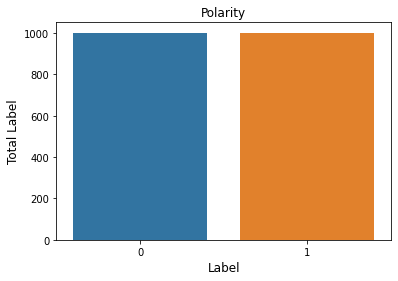

In [ ]:
sns.countplot(x='label', data=df)
plt.title('Polarity')
plt.ylabel('Total Label', fontsize=12)
plt.xlabel('Label', fontsize=12)

In [ ]:
df['label'].value_counts()

0    1001
1    1000
Name: label, dtype: int64

# Preprocessing Data

In [ ]:
data = df[['review', 'label']]
data.head()

,review,label
0,"making his directorial debut , actor jon favre...",1
1,"[note : after claiming otherwise , my appetite...",1
2,"i know that "" funnest "" isn't a word . \n "" fu...",1
3,it's a sad state of affairs when the back box ...,0
4,"sick : the life and death of bob flanagan , su...",1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2001 non-null   object
 1   label   2001 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
import string

#removing special characters
def cleaning(s):
    clear_string = ""
    for symbol in s:
        if symbol not in string.punctuation:
            clear_string += symbol
    return clear_string

In [ ]:
#removing certain characters
string_punctuation =  "\n"

def remove(s):
    no_punct = ""
    for letter in s:
        if letter not in string_punctuation:
            no_punct += letter
    return no_punct

In [ ]:
data['review_clean'] = data['review'].apply(cleaning)
data['review_clean'] = data['review_clean'].apply(remove)

#removing numbers
data['review_clean'] = data['review_clean'].str.replace(r'\d+','')

data = data[['review_clean','label']]
data.head()

,review_clean,label
0,making his directorial debut actor jon favrea...,1
1,note after claiming otherwise my appetite wa...,1
2,i know that funnest isnt a word fun is a...,1
3,its a sad state of affairs when the back box b...,0
4,sick the life and death of bob flanagan supe...,1


# TF-IDF

In [ ]:
def tfidf(X_train, X_test, y_train, y_test):
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()

    #get feature names
    terms = vectorizer.get_feature_names()
    
    return X_train, X_test, y_train, y_test, terms

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data['review_clean'], data['label'], test_size = 0.2, random_state = 9)
X_train2, X_test2, y_train2, y_test2 = train_test_split(data['review_clean'], data['label'], test_size = 0.3, random_state = 9)

In [ ]:
data_train1 = pd.DataFrame({'review_text' : np.array(X_train1),
                               'label' : np.array(y_train1)})
data_test1 = pd.DataFrame({'review_text' : np.array(X_test1),
                               'label' : np.array(y_test1)})
data_train2 = pd.DataFrame({'review_text' : np.array(X_train2),
                               'label' : np.array(y_train2)})
data_test2 = pd.DataFrame({'review_text' : np.array(X_test2),
                               'label' : np.array(y_test2)})

In [ ]:
X_train1, X_test1, y_train1, y_test1, terms1 = tfidf(X_train1, X_test1, y_train1, y_test1)
X_train2, X_test2, y_train2, y_test2, terms2 = tfidf(X_train2, X_test2, y_train2, y_test2)

In [ ]:
terms1

['ability',
 'able',
 'about',
 'above',
 'absolutely',
 'across',
 'act',
 'acting',
 'action',
 'actor',
 'actors',
 'actress',
 'actual',
 'actually',
 'add',
 'after',
 'again',
 'against',
 'age',
 'agent',
 'ago',
 'air',
 'alien',
 'aliens',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'america',
 'american',
 'among',
 'amusing',
 'an',
 'and',
 'animated',
 'animation',
 'annoying',
 'another',
 'any',
 'anyone',
 'anything',
 'anyway',
 'apparently',
 'appear',
 'appears',
 'are',
 'arent',
 'army',
 'around',
 'art',
 'as',
 'ask',
 'at',
 'atmosphere',
 'attempt',
 'attempts',
 'attention',
 'audience',
 'audiences',
 'away',
 'awful',
 'back',
 'background',
 'bad',
 'based',
 'basically',
 'batman',
 'battle',
 'be',
 'beautiful',
 'beauty',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'begin',
 'beginning',
 'begins',
 'behind',
 'being',
 'believe',
 'ben',
 'best',
 'better',
 'between',
 'beyond',
 

In [ ]:
terms2

['ability',
 'able',
 'about',
 'above',
 'absolutely',
 'across',
 'act',
 'acting',
 'action',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'after',
 'again',
 'against',
 'age',
 'agent',
 'ago',
 'air',
 'alien',
 'aliens',
 'all',
 'allen',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'america',
 'american',
 'among',
 'amusing',
 'an',
 'and',
 'animated',
 'animation',
 'annoying',
 'another',
 'any',
 'anyone',
 'anything',
 'anyway',
 'apparently',
 'appear',
 'appears',
 'are',
 'arent',
 'army',
 'around',
 'art',
 'as',
 'ask',
 'aspect',
 'at',
 'atmosphere',
 'attempt',
 'attempts',
 'attention',
 'audience',
 'audiences',
 'away',
 'awful',
 'back',
 'background',
 'bad',
 'based',
 'basically',
 'batman',
 'battle',
 'be',
 'beautiful',
 'beauty',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'begin',
 'beginning',
 'begins',
 'behind',
 'being',
 'believe',
 'ben',
 'best',
 'better',
 'between',
 '

In [ ]:
X_train1.shape

(1600, 1000)

In [ ]:
X_test1.shape

(401, 1000)

In [ ]:
X_train2.shape

(1400, 1000)

In [ ]:
X_test2.shape

(601, 1000)

# Classification

In [ ]:
def classification(X_train, X_test, y_train, y_test):
    %%time
    # clf = MultinomialNB()
    clf = SVC(kernel='linear', gamma=0.1, C=1.0)
    # clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test) # predict data test
    pred = clf.predict(X_train) # predict data train
    return y_pred, pred

In [ ]:
def confMatrix(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))

In [ ]:
def confMatrix(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))

In [ ]:
y_pred1, pred1 = classification(X_train1, X_test1, y_train1, y_test1)
y_pred2, pred2 = classification(X_train2, X_test2, y_train2, y_test2)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [ ]:
confMatrix(y_test1, y_pred1)

[[151  30]
 [ 41 179]]


In [ ]:
print(round((accuracy_score(y_test1, y_pred1) * 100) , 2))

82.29


In [ ]:
print(round((accuracy_score(y_train1, pred1) * 100), 2))

91.88


In [ ]:
confMatrix(y_test2, y_pred2)

[[229  57]
 [ 65 250]]


In [ ]:
print(round((accuracy_score(y_test2, y_pred2) * 100) , 2))

79.7


In [ ]:
print(round((accuracy_score(y_train2, pred2) * 100) , 2))

92.29


In [ ]:
data_train1['prediction'] = pred1
data_test1['prediction'] = y_pred1
data_train2['prediction'] = pred2
data_test2['prediction'] = y_pred2

In [ ]:
data_train1

,review_text,label,prediction
0,one fun activity for parents during the holida...,1,1
1,getting it right is a far far cry from the tee...,1,1
2,the long and illustrious career of robin willi...,1,0
3,well lets see im not quite sure how to revi...,0,0
4,did i do something bad i must have because s...,0,0
...,...,...,...
1595,whenever studio executives try to combine the ...,1,1
1596,ive always been a kevin kline fan silverado ...,0,1
1597,the ring is probably one of the creepiest movi...,1,1
1598,i wont even pretend that i have seen the othe...,0,0


In [ ]:
data_test1

,review_text,label,prediction
0,magnolia left me relling from the theatre sta...,1,1
1,about an hour or so into the jackal a chara...,0,0
2,richard linklaters slacker made in for a b...,1,0
3,in a ship set sail on her maiden voyage acro...,1,1
4,who knew that in years eddie murphy who made...,0,0
...,...,...,...
396,plot a group of asbestos cleaners get a job r...,1,1
397,plot based on the wildly popular jerry sprin...,0,0
398,it is hard to imagine that a movie which inclu...,1,1
399,jonathan demmes beloved based on the book ton...,1,1


In [ ]:
data_train2

,review_text,label,prediction
0,there exists a litany of differences between a...,1,1
1,since the dramatic picture has undergone a c...,1,1
2,fritz langs first american film since leaving ...,1,1
3,whenever u s government starts meddling into...,0,0
4,darren jason biggs wayne steve zahn and ...,0,0
...,...,...,...
1395,whenever studio executives try to combine the ...,1,1
1396,ive always been a kevin kline fan silverado ...,0,1
1397,the ring is probably one of the creepiest movi...,1,1
1398,i wont even pretend that i have seen the othe...,0,0


In [ ]:
data_test2

,review_text,label,prediction
0,magnolia left me relling from the theatre sta...,1,1
1,about an hour or so into the jackal a chara...,0,0
2,richard linklaters slacker made in for a b...,1,0
3,in a ship set sail on her maiden voyage acro...,1,1
4,who knew that in years eddie murphy who made...,0,0
...,...,...,...
596,no matter what you suspect this isnt your usu...,1,1
597,another formula feel good quirky comedy from t...,0,0
598,a new entry in the revisionist history genre...,0,0
599,it is easy to see why the late stanley kubrick...,1,1


In [ ]:
data_train1.to_csv('data_train1.csv')
data_test1.to_csv('data_test1.csv')
data_train2.to_csv('data_train2.csv')
data_test2.to_csv('data_test2.csv')